# Technical Model

## Import Modules

In [72]:
#Load all important library in here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

#Encoders
import category_encoders as ce

#Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier


#Data Selection
from sklearn.model_selection import KFold

#Hyperparameter
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV


#Prepocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Supress Notebook Warning
import warnings
warnings.filterwarnings('ignore')

#Pandas Options 

## 1. Load Cleaned Data

Load data that has been cleaned and generated during the EDA process

In [73]:
df = pd.read_csv('./Datasets/database_cleaned.csv',low_memory=False)
df.head()

,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Combined MPG (FT1),Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1),Tailpipe CO2 (FT1),Fuel Economy Score,Drive Type,Transmission Type
0,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1830,4.0,2.5,0.0,0.0,Regular,17,2050,19.388824,-1,-1,2-Wheel Drive,Automatic
1,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1880,4.0,2.5,0.0,0.0,Regular,17,2050,19.388824,-1,-1,2-Wheel Drive,Automatic
2,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1831,6.0,4.2,0.0,0.0,Regular,13,2700,25.354615,-1,-1,2-Wheel Drive,Automatic
3,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1881,6.0,4.2,0.0,0.0,Regular,13,2700,25.354615,-1,-1,2-Wheel Drive,Automatic
4,1984,American Motors Corporation,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,1524,6.0,4.2,0.0,0.0,Regular,17,2050,19.388824,-1,-1,4-Wheel or All-Wheel Drive,Automatic


Check NA, by right it should already been cleaned

In [74]:
df.isna().sum()

Year                                   0
Make                                   0
Class                                  0
Drive                                  0
Transmission                           0
Engine Index                           0
Engine Cylinders                       0
Engine Displacement                    0
Turbocharger                           0
Supercharger                           0
Fuel Type                              0
Combined MPG (FT1)                     0
Annual Fuel Cost (FT1)                 0
Annual Consumption in Barrels (FT1)    0
Tailpipe CO2 (FT1)                     0
Fuel Economy Score                     0
Drive Type                             0
Transmission Type                      0
dtype: int64

Check duplicates

In [75]:
df.duplicated().value_counts()

False    33626
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33626 entries, 0 to 33625
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 33626 non-null  int64  
 1   Make                                 33626 non-null  object 
 2   Class                                33626 non-null  object 
 3   Drive                                33626 non-null  object 
 4   Transmission                         33626 non-null  object 
 5   Engine Index                         33626 non-null  int64  
 6   Engine Cylinders                     33626 non-null  float64
 7   Engine Displacement                  33626 non-null  float64
 8   Turbocharger                         33626 non-null  float64
 9   Supercharger                         33626 non-null  float64
 10  Fuel Type                            33626 non-null  object 
 11  Combined MPG (FT1)          

## 2. Segregate Features

We will use the same features selection that has been declared during the EDA process. Below feature will be used to segregate the data later during the model creation process

In [77]:
#List of Predictor
predictor_feat = ['Year', 'Make', 'Class', 'Drive', 'Transmission', 'Engine Index',
    'Engine Cylinders', 'Engine Displacement', 'Turbocharger', 'Supercharger', 'Fuel Type']

#Response Feature that will use Regression Model / Target Variable/Dependent Variable
reg_resp_feat = [
    'Combined MPG (FT1)', 'Annual Fuel Cost (FT1)',
    'Annual Consumption in Barrels (FT1)', 'Tailpipe CO2 (FT1)',
    ]

#Response feature that will use Classification Model
class_resp_feat = ['Fuel Economy Score']

## 3. Correlation Matrix

Copy the logic from EDA notebook to determine the correlation and save the correlation into dictionary. We will use this later when we create our model

In [78]:
obj_feat = [feature for feature in df.axes[1] if df[feature].dtypes == 'object']
encoder = ce.OrdinalEncoder(cols = obj_feat,return_df = True)
df_encoded = encoder.fit_transform(df)
df_encoded.head()

,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Combined MPG (FT1),Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1),Tailpipe CO2 (FT1),Fuel Economy Score,Drive Type,Transmission Type
0,1984,1,1,1,1,1830,4.0,2.5,0.0,0.0,1,17,2050,19.388824,-1,-1,1,1
1,1984,1,1,1,1,1880,4.0,2.5,0.0,0.0,1,17,2050,19.388824,-1,-1,1,1
2,1984,1,1,1,1,1831,6.0,4.2,0.0,0.0,1,13,2700,25.354615,-1,-1,1,1
3,1984,1,1,1,1,1881,6.0,4.2,0.0,0.0,1,13,2700,25.354615,-1,-1,1,1
4,1984,2,2,2,1,1524,6.0,4.2,0.0,0.0,1,17,2050,19.388824,-1,-1,2,1


<AxesSubplot: >

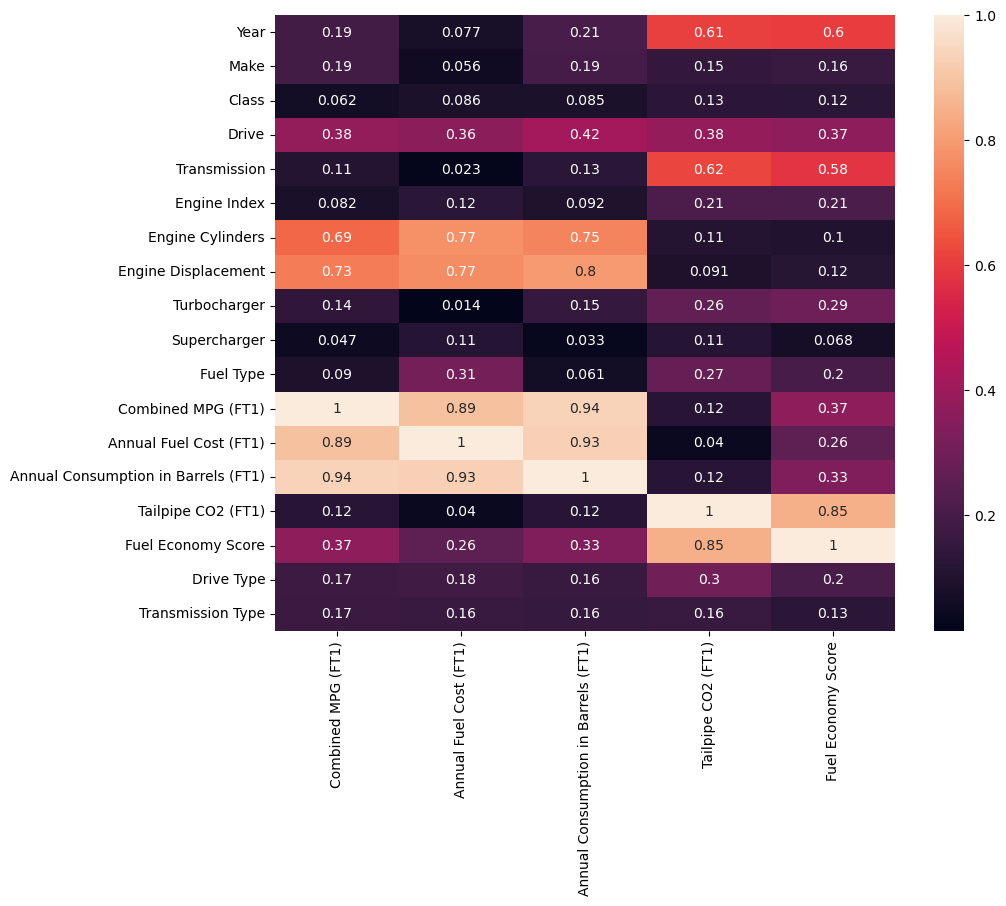

In [79]:
#Get Correlation for response Variable
df_corr = df_encoded.corr()
df_corr = df_corr[reg_resp_feat+class_resp_feat]

#Abs correlation value
for feat in reg_resp_feat+class_resp_feat:
    df_corr[feat] = np.abs(df_corr[feat])

#Draw Heat Map
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_corr[reg_resp_feat+class_resp_feat],ax=ax,annot=True)

## 4. Model selection

We have Regression Type (Combined MPG, Annual Fuel Cost, Annual Consumption in Barrels) and Classification type (Fuel Economy Score) response feature.<br> a. For regression we will use either Linear Regression, Ridge Regression or Lasso Regression method 
<br>b. For classification we will use either K-Nearest Neighbors, Random Forest Classifier or Logistic Regression. 

<br>We will decide which model is the best for each features based on the regression score (Max Error, Variance, R2, RMS, Model Score) or Classification score (Accuracy, Precission, Recall and F1 score). The performance of each algorithm (ex : Execution time, Resources consumption) will also be considered as part of the selection process

## 5 Encoding Predictor

If we look into the data there are 4 features that need encoding which are <br>
<t>1. Make <br>
<t>2. Class<br>
<t>3. Drive <br>
<t>4. Transmission <br>
<t>5. Fuel Type <br>

In [80]:
encode_feat = ['Make','Class','Drive','Transmission', 'Fuel Type']
df.head()

,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Combined MPG (FT1),Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1),Tailpipe CO2 (FT1),Fuel Economy Score,Drive Type,Transmission Type
0,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1830,4.0,2.5,0.0,0.0,Regular,17,2050,19.388824,-1,-1,2-Wheel Drive,Automatic
1,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1880,4.0,2.5,0.0,0.0,Regular,17,2050,19.388824,-1,-1,2-Wheel Drive,Automatic
2,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1831,6.0,4.2,0.0,0.0,Regular,13,2700,25.354615,-1,-1,2-Wheel Drive,Automatic
3,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1881,6.0,4.2,0.0,0.0,Regular,13,2700,25.354615,-1,-1,2-Wheel Drive,Automatic
4,1984,American Motors Corporation,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,1524,6.0,4.2,0.0,0.0,Regular,17,2050,19.388824,-1,-1,4-Wheel or All-Wheel Drive,Automatic


### 5.1 Decide encoding method

Let's get the total unique values for each 5 features

In [81]:
enc_method = [{'feature': feat, 'num_unique_val':len(df[feat].unique())} for feat in encode_feat ]
pd.DataFrame(enc_method)

,feature,num_unique_val
0,Make,123
1,Class,34
2,Drive,7
3,Transmission,44
4,Fuel Type,11


From above statistics we can applied 3 types of encoding <br>
#### 1. Binary Encoding : 
<t>we will applied this for "Drive" & "Fuel Type" features since this encode will expand at each feature to max 4 feature.<br>

#### 2. Base N encoding : 
this will be applied for "Class" and "Transmission" features. If we use Binary encoding, the feature will be expanded to 6, using Base N, we will only expanded those features to 4 features with Base = 3.<br>

#### 3. Leave one out : 
We will applied this type of encoding to "Make" feature since it has over a hundred unique values


After the encoding process, the data dimensions will expand from (33626,17) to (33626, 29).

In [82]:
#Reformat the encode method dictionary to add the encode method for each feature. We will use this to determine the encoding method dynamically when
#training or use the model.
enc_method = [{'feature': feat, 'num_unique_val':len(df[feat].unique()), 
               'enc_method': 'binary' if feat in ['Drive','Fuel Type'] else ('loo' if feat == 'Make' else 'basen')} 
              for feat in encode_feat ]
pd.DataFrame(enc_method)

,feature,num_unique_val,enc_method
0,Make,123,loo
1,Class,34,basen
2,Drive,7,binary
3,Transmission,44,basen
4,Fuel Type,11,binary


## 6. Functions List

This section is reserved for creating a function which will be used in this notebook during the model creation.

### Base Functions

In [83]:
#Get Correllation of the response feature
def get_corr(feature):
    df_corr_1 = df_corr[[feature]]
    #Correlation will be automatically sorted based on the highest value and excluding the response variable
    return df_corr_1[df_corr_1.index.isin(predictor_feat)].rename(columns={feature:'corr'}).sort_values(by=['corr'],ascending=False)

In [84]:
#Get Split X & y data incude encode X data
def split_X_encoded_y(df,Xfeat,yfeat,standarized = False):
    X = encode_x(df[Xfeat],df[yfeat],Xfeat)
    X = preprocessing.scale(X) if standarized else X
    return X, df[yfeat] 

### Encoder Functions

In [85]:
#Base N encoder
def base_n_encoder(X,feature,base=3):
    ce_baseN = ce.BaseNEncoder(cols=feature,base=base)
    return ce_baseN.fit_transform(X)

In [86]:
#Binary Encoder
def binary_encoder(X,feature):
    ce_binary = ce.BinaryEncoder(cols = feature)
    return ce_binary.fit_transform(X)

In [87]:
#Leave One Out Encoder
def leave_one_out(X,Xfeature,y):
    ce_loo = ce.LeaveOneOutEncoder(cols=Xfeature)
    return ce_loo.fit_transform(X,y)

In [88]:
#Encode X
def encode_x(X,y,Xfeat):
    for enc in enc_method:
        #Encode only features that will be considered for data modelling
        if enc['feature'] in Xfeat:
            X = leave_one_out(X,enc['feature'],y) if enc['enc_method'] == 'loo' else( binary_encoder(X,enc['feature']) if enc['enc_method'] == 'binary' else base_n_encoder(X,enc['feature']))         
    return X    


### Classificication Model

In [89]:
def smoothen_weight(labels_dict,mu=0.15):
    total = np.sum(list(labels_dict.values()))
    keys = labels_dict.keys()
    weight = {}
    for i in keys:
        score = np.log(mu*total/float(labels_dict[i]))
        weight[i] = score if score > 1 else 1
    return weight

In [90]:
def get_confusion_matrix(y_test,y_pred):
    return pd.crosstab(np.ravel(y_test),y_pred,rownames=['Actual'],colnames=['Predicted'])

In [91]:
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
def logistic_reg_cv(df,Xfeat,yfeat,folds):
    C_values = [1]
    X, y = split_X_encoded_y(df,Xfeat,yfeat)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    #Oversampling using SMOTE
    sm = SMOTE(random_state=44)
    X_train_o,y_train_o = sm.fit_resample(X_train, y_train)
    clf = LogisticRegressionCV(Cs=C_values, cv=folds, 
                               refit=False,n_jobs=-1,
                               max_iter=1000,solver='sag',
                               multi_class='multinomial').fit(X_train_o,y_train_o)
    y_predict = clf.predict(X_test)
    return clf,classification_report(y_test,y_predict,output_dict=True),classification_report(y_test,y_predict,output_dict=False),get_confusion_matrix(y_test,y_predict)

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
def knn_hyperparameter(df,Xfeat,yfeat,folds):
    X, y = split_X_encoded_y(df,Xfeat,yfeat)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    sm = SMOTE(random_state=42)
    X_train_o,y_train_o = sm.fit_resample(X_train, y_train)
    tune_param = {
        'weights':np.array(['uniform','distance']),
        'n_neighbors':np.array(range(5,100))
    }
    grid = GridSearchCV(estimator = KNeighborsClassifier(n_jobs=-1),param_grid = tune_param,
                        cv=folds,n_jobs= -1).fit(X_train_o,np.ravel(y_train_o))
    
    y_predict = grid.predict(X_test)
    
    return grid, classification_report(y_test,y_predict,output_dict=True),classification_report(y_test,y_predict,output_dict=False),get_confusion_matrix(y_test,y_predict)
    
    

In [93]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
def rfc_hyperparameter(df,Xfeat,yfeat,folds):
    X, y = split_X_encoded_y(df,Xfeat,yfeat)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    sm = SMOTE(random_state=44)
    X_train_o,y_train_o = sm.fit_resample(X_train, y_train)
    tune_param = {
        'n_estimators':np.array([100,200,300]),
        'max_depth' : np.array([None,101,151]),    
        'min_samples_split' : np.array([3,4,6]),
        'min_samples_leaf' : np.array([2])
    }    
    grid = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1),param_grid = tune_param,
                        cv=folds,n_jobs= -1).fit(X_train_o,np.ravel(y_train_o)) 
    
    y_predict = grid.predict(X_test)
    
    return grid, classification_report(y_test,y_predict,output_dict=True),classification_report(y_test,y_predict,output_dict=False),get_confusion_matrix(y_test,y_predict)

###  Regression Model

In [94]:
def plot_reg_res(title,result):
    ttl_dat=500
    df_combined = pd.concat([pd.DataFrame({'X':np.array(range(0,ttl_dat)),'type':np.array(['actual']*ttl_dat),'y':result[1][0:ttl_dat]}),
                             pd.DataFrame({'X':np.array(range(0,ttl_dat)),'type':np.array(['predicted']*ttl_dat),'y':result[2][0:ttl_dat]})])
    df_combined.sort_values(by=['X','type'],ascending=[True,True], inplace=True)
    sns.lmplot(data=df_combined,x='X',y='y',hue='type',height=7,aspect=2).fig.suptitle(title +'plot for the first '+ str(ttl_dat) +' data')

In [95]:
def get_reg_metrics(model_name,y_pred,y_test):
    return {
        'model':model_name,
        'max_error': max_error(y_test,y_pred),
        'variance' : explained_variance_score(y_test,y_pred),
        'r2': r2_score(y_test,y_pred),
        'root_mean_sqr_error':mean_squared_error(y_test,y_pred),
        'mean_abs_error':mean_absolute_error(y_test, y_pred)}

In [96]:
def linreg_cv_score(df,Xfeat,yfeat,folds=100):
    #Split X(Include encoding if necessary) & Y    
    X, y = split_X_encoded_y(df,Xfeat,yfeat)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    grid = GridSearchCV(estimator = LinearRegression(n_jobs=-1),param_grid = {},
                        cv=folds,n_jobs= -1).fit(X_train,np.ravel(y_train))    
    
    y_pred = grid.predict(X_test)
                        
    return grid,get_reg_metrics('Linear Regression',y_pred,y_test),(np.ravel(X_test),np.ravel(y_test),y_pred)

In [97]:
def ridgereg_cv(df,Xfeat,yfeat,folds,min_alpha=100,max_alpha=200):
    X,y = split_X_encoded_y(df,Xfeat,yfeat,True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    clf = RidgeCV(alphas=range(min_alpha,max_alpha+1),cv=folds,scoring='neg_root_mean_squared_error').fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    return clf, get_reg_metrics('Ridge Regression',y_pred,y_test),(np.ravel(X_test),np.ravel(y_test),np.ravel(y_pred))

In [98]:
def lassoreg_cv(df,Xfeat,yfeat,folds,min_alpha=100,max_alpha=200):
    X,y = split_X_encoded_y(df,Xfeat,yfeat,True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    clf = LassoCV(alphas=range(min_alpha,max_alpha+1),cv=folds,n_jobs=-1).fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    return clf, get_reg_metrics('Lasso Regression',y_pred,y_test),(np.ravel(X_test),np.ravel(y_test),np.ravel(y_pred))

## 7. Regression Model

We will go though one by one each response features that needs to be predicted using a regression model. 

### 7.1 Model determination methodolody
For regression we will compare 3 models:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression.

We will train our data into these 3 models for each response feature and compare the performance based on the metrics like R2 & RMSE and the score produced by each model. Based on that score we will pick 1 best model

### 7.2 Combined MPG (FT1)

#### Correlation

In [99]:
df_corr_work = get_corr('Combined MPG (FT1)')
df_corr_work

,corr
Engine Displacement,0.732492
Engine Cylinders,0.686449
Drive,0.378171
Make,0.189224
Year,0.188155
Turbocharger,0.139799
Transmission,0.107529
Fuel Type,0.090021
Engine Index,0.081560
Class,0.061647


In [100]:
Xfeatures = df_corr_work[0:3].index.tolist()

In [101]:
#Reserved to store the scoring of each model
score_list = [] 

In [102]:
y_feature = 'Combined MPG (FT1)'

#### Linear Regression Model

In [103]:
mdl,score,result_lr = linreg_cv_score(df,Xfeatures,[y_feature],folds=100)

In [104]:
score_list.append(score)

In [105]:
score

{'model': 'Linear Regression',
 'max_error': 31.07113652038773,
 'variance': 0.5981183250308433,
 'r2': 0.5980654534551082,
 'root_mean_sqr_error': 10.116352391525705,
 'mean_abs_error': 2.224772248661501}

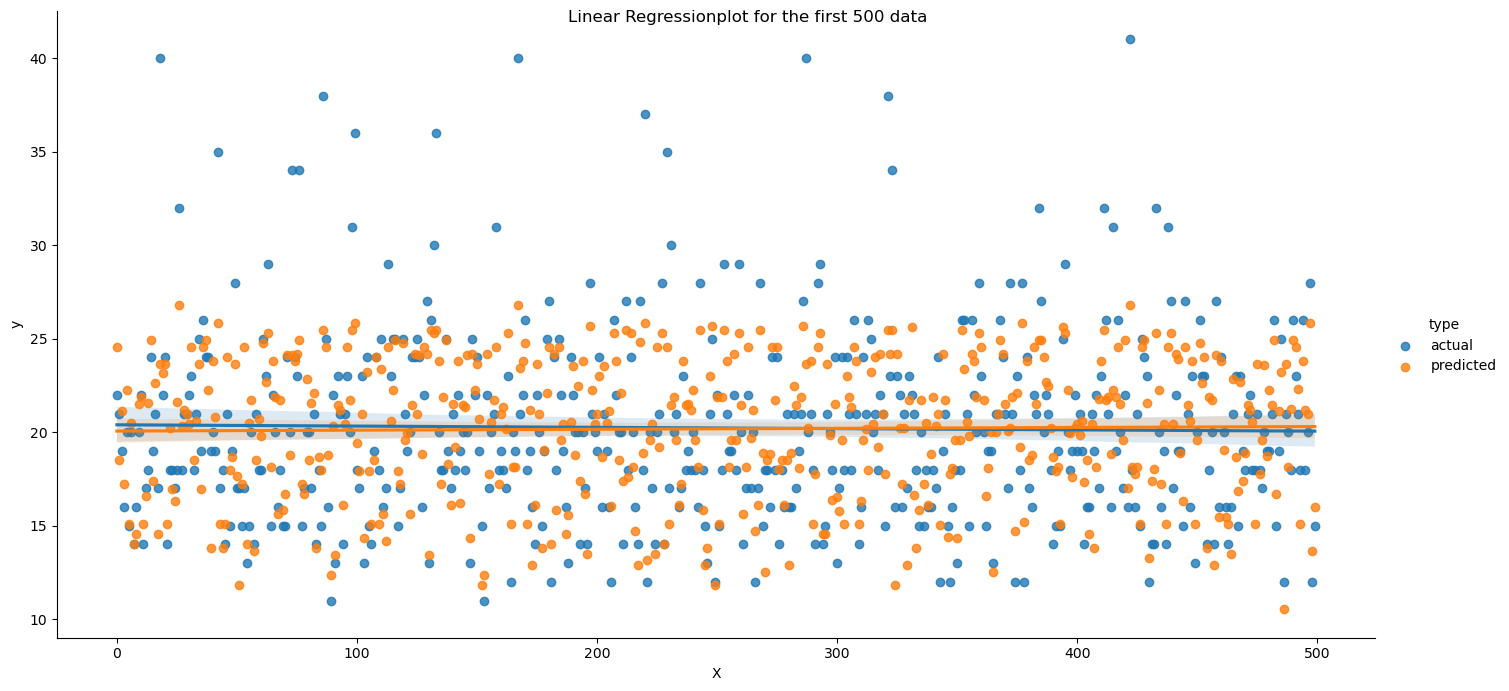

In [106]:
plot_reg_res(score['model'],result_lr)

We will use this as our baseline to create another 2 model (Ridge and Lasso) which are more advanced 

#### Ridge Regression Model

In [107]:
mdl,score,result_rd = ridgereg_cv(df,Xfeatures,[y_feature],folds=100,min_alpha=0,max_alpha=10)

In [108]:
score_list.append(score)

In [109]:
score

{'model': 'Ridge Regression',
 'max_error': 26.19385028492286,
 'variance': 0.6067784009353088,
 'r2': 0.606754314185725,
 'root_mean_sqr_error': 9.880604226915862,
 'mean_abs_error': 2.238278368373629}

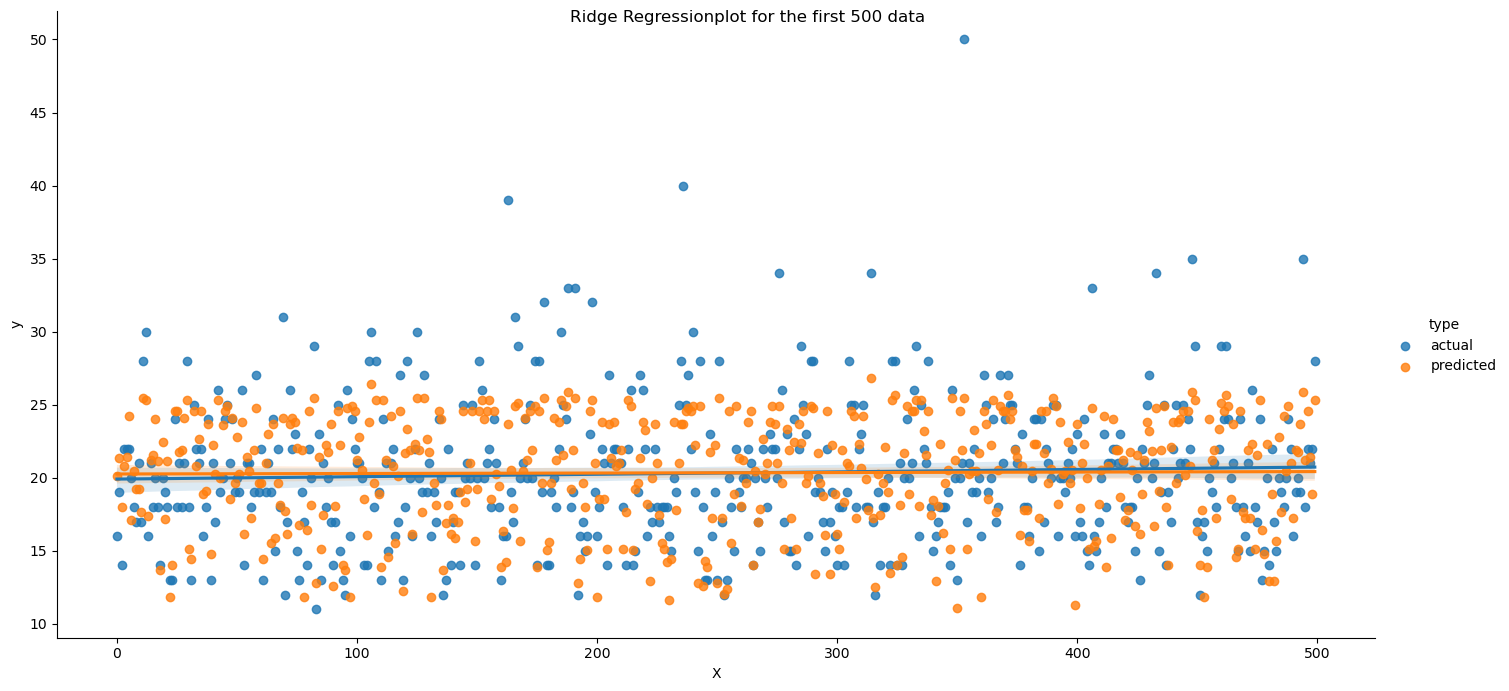

In [110]:
plot_reg_res(score['model'],result_rd)

#### Lasso Regression Model

In [111]:
mdl,score,result_ls = lassoreg_cv(df,Xfeatures,[y_feature],folds=100,min_alpha=0,max_alpha=10)

In [112]:
score_list.append(score)

In [113]:
score

{'model': 'Lasso Regression',
 'max_error': 32.71337601163842,
 'variance': 0.6056250399059611,
 'r2': 0.6055131875904338,
 'root_mean_sqr_error': 9.916595307152624,
 'mean_abs_error': 2.2215640038989015}

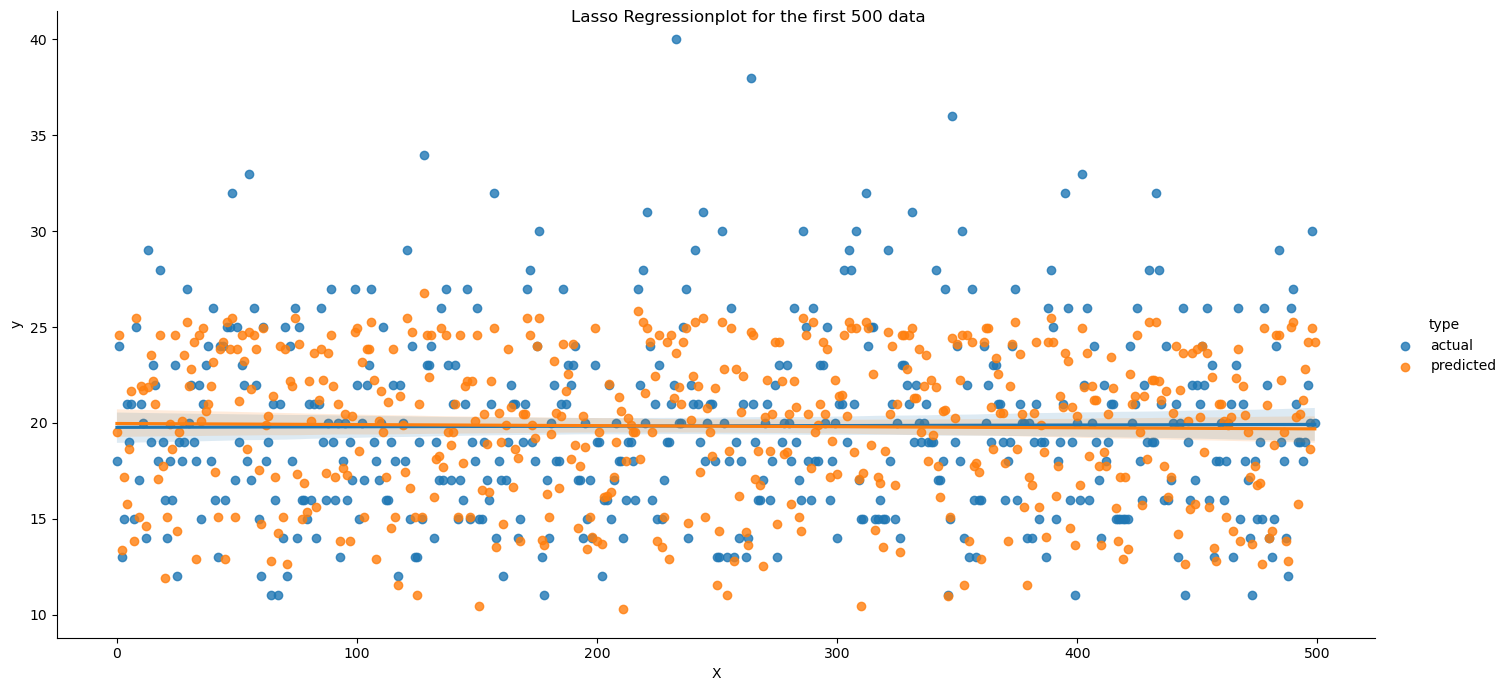

In [114]:
plot_reg_res(score['model'],result_ls)

#### Comparison & Conclusion

In [115]:
pd.DataFrame(score_list)

,model,max_error,variance,r2,root_mean_sqr_error,mean_abs_error
0,Linear Regression,31.071137,0.598118,0.598065,10.116352,2.224772
1,Ridge Regression,26.193850,0.606778,0.606754,9.880604,2.238278
2,Lasso Regression,32.713376,0.605625,0.605513,9.916595,2.221564


All models are perform almost the same based on above score. There're are no significant gaps for between each model

### 7.3 Annual Fuel Cost

#### Correlation

In [116]:
df_corr_work = get_corr('Annual Fuel Cost (FT1)')
df_corr_work

,corr
Engine Cylinders,0.774974
Engine Displacement,0.767733
Drive,0.355018
Fuel Type,0.307165
Engine Index,0.123758
Supercharger,0.111137
Class,0.085996
Year,0.077298
Make,0.055865
Transmission,0.022525


In [117]:
Xfeatures = df_corr_work[0:4].index.tolist()

In [118]:
#Reserved to store the scoring of each model
score_list = [] 

In [119]:
y_feature = 'Annual Fuel Cost (FT1)'

#### Linear Regression Model

In [120]:
mdl,score,result_lr = linreg_cv_score(df,Xfeatures,[y_feature],folds=100)

In [121]:
score_list.append(score)

In [122]:
score

{'model': 'Linear Regression',
 'max_error': 1281.9649352246138,
 'variance': 0.7522260085757972,
 'r2': 0.7520695428700567,
 'root_mean_sqr_error': 59042.58120095507,
 'mean_abs_error': 182.74270219250639}

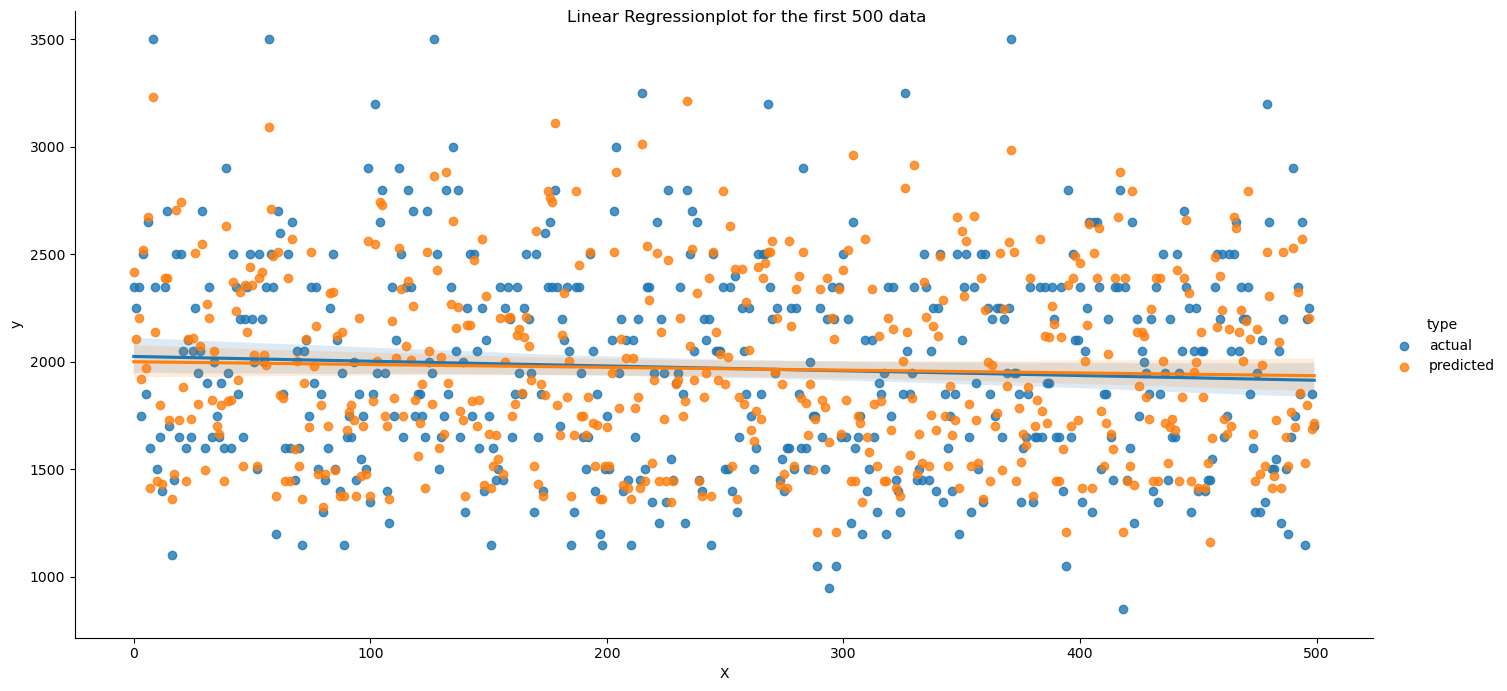

In [123]:
plot_reg_res(score['model'],result_lr)

We will use this as our baseline to create another 2 model (Ridge and Lasso) which are more advanced 

#### Ridge Regression Model

In [124]:
mdl,score,result_rd = ridgereg_cv(df,Xfeatures,[y_feature],folds=100,min_alpha=0,max_alpha=10)

In [125]:
score_list.append(score)

In [126]:
score

{'model': 'Ridge Regression',
 'max_error': 1354.7815016351688,
 'variance': 0.7567217205169877,
 'r2': 0.7567146714235767,
 'root_mean_sqr_error': 58176.0371500912,
 'mean_abs_error': 180.86501057946757}

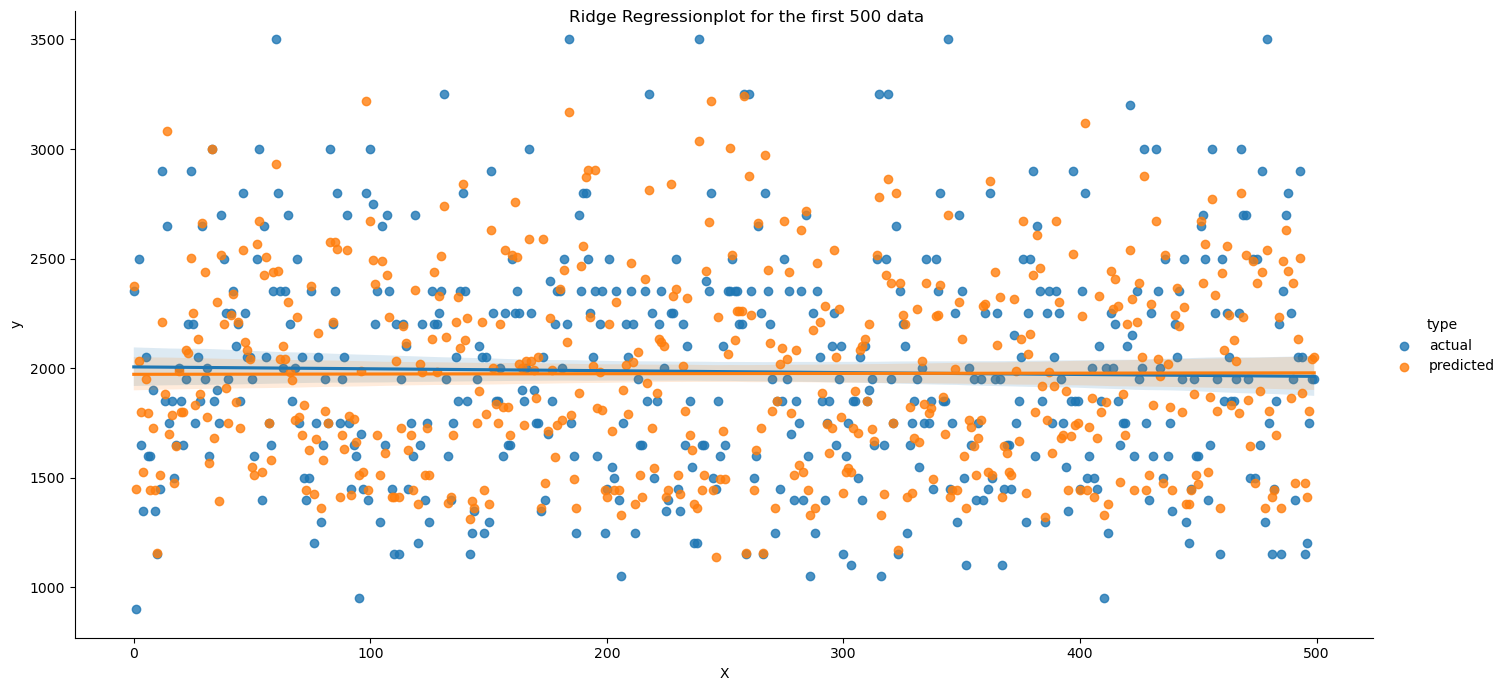

In [127]:
plot_reg_res(score['model'],result_rd)

#### Lasso Regression Model

In [128]:
mdl,score,result_ls = lassoreg_cv(df,Xfeatures,[y_feature],folds=100,min_alpha=0,max_alpha=10)

In [129]:
score_list.append(score)

In [130]:
score

{'model': 'Lasso Regression',
 'max_error': 1373.4868239398143,
 'variance': 0.7514710489704941,
 'r2': 0.7514697401716701,
 'root_mean_sqr_error': 59596.917665523324,
 'mean_abs_error': 183.02325726543836}

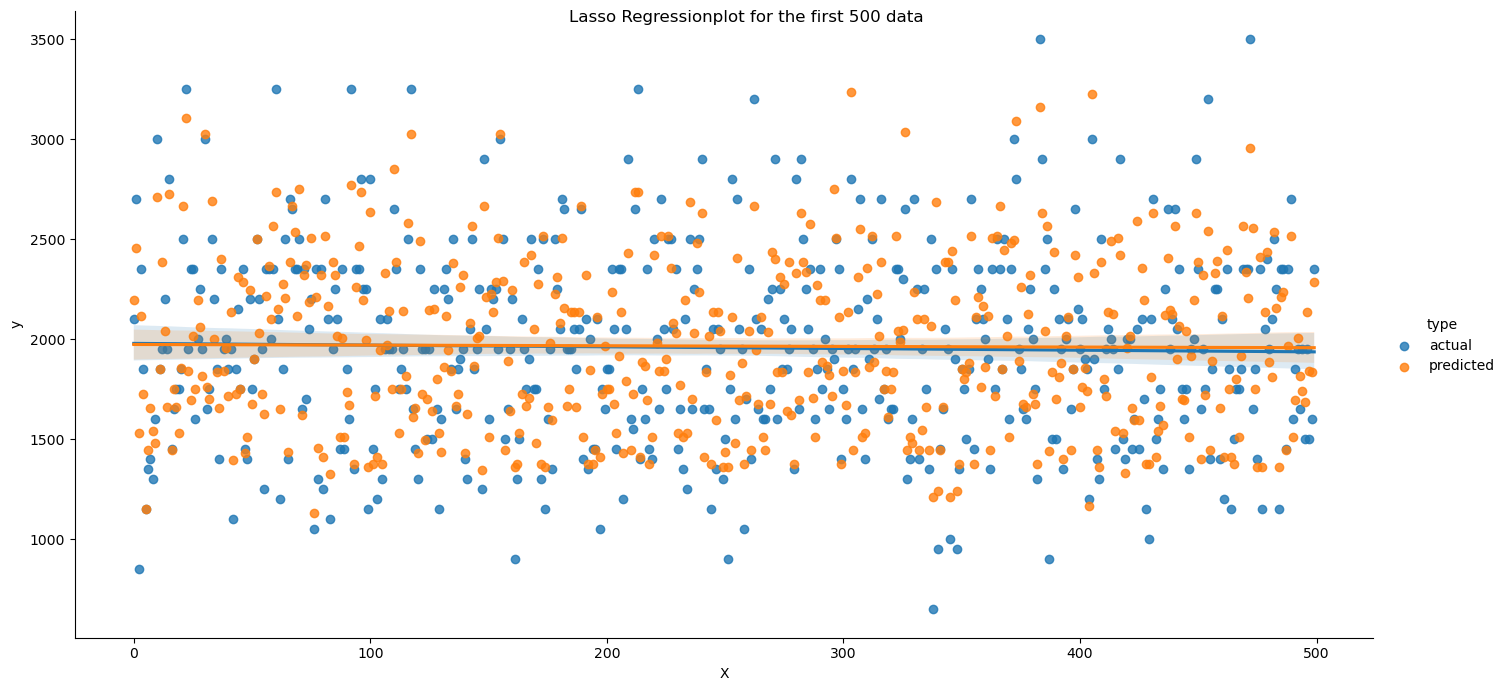

In [131]:
plot_reg_res(score['model'],result_ls)

#### Comparison & Conclusion

In [132]:
pd.DataFrame(score_list)

,model,max_error,variance,r2,root_mean_sqr_error,mean_abs_error
0,Linear Regression,1281.964935,0.752226,0.752070,59042.581201,182.742702
1,Ridge Regression,1354.781502,0.756722,0.756715,58176.037150,180.865011
2,Lasso Regression,1373.486824,0.751471,0.751470,59596.917666,183.023257


This feature have a a very high RMSE and MAE. From my observation in both original and cleaned dataset, there are no feature that explain the average milage usage. All above 3 model performs almost the same based on the scoring above

### 7.4 Annual Consumption in Barrels

#### Correlation

In [133]:
df_corr_work = get_corr('Annual Consumption in Barrels (FT1)')
df_corr_work

,corr
Engine Displacement,0.796752
Engine Cylinders,0.746012
Drive,0.415405
Year,0.206103
Make,0.193382
Turbocharger,0.151291
Transmission,0.125087
Engine Index,0.091806
Class,0.084974
Fuel Type,0.060644


In [134]:
Xfeatures = df_corr_work[0:3].index.tolist()

In [135]:
#Reserved to store the scoring of each model
score_list = [] 

In [136]:
y_feature = 'Annual Consumption in Barrels (FT1)'

#### Linear Regression Model

In [137]:
mdl,score,result_lr = linreg_cv_score(df,Xfeatures,[y_feature],folds=100)

In [138]:
score_list.append(score)

In [139]:
score

{'model': 'Linear Regression',
 'max_error': 12.474201521489789,
 'variance': 0.7035196962642094,
 'r2': 0.7035133514316756,
 'root_mean_sqr_error': 4.932286445093368,
 'mean_abs_error': 1.6712544059715915}

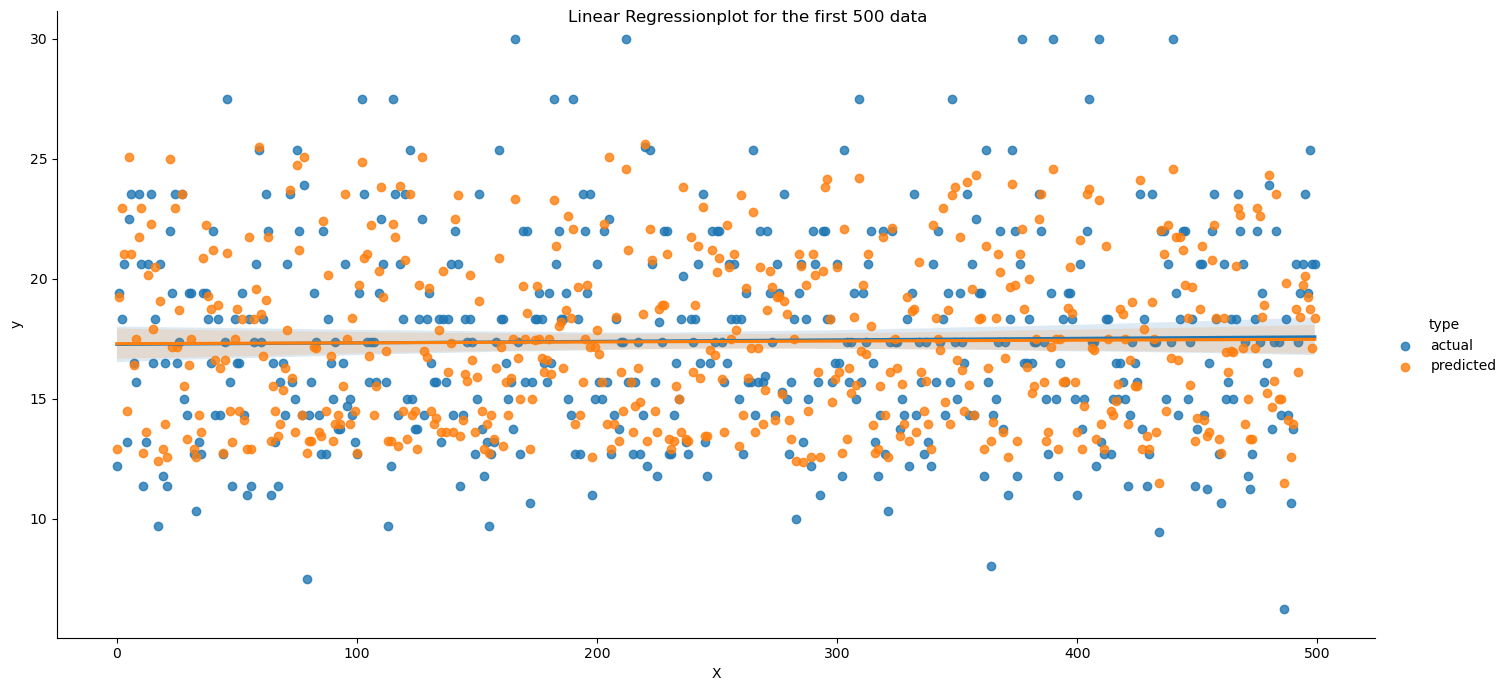

In [140]:
plot_reg_res(score['model'],result_lr)

We will use this as our baseline to create another 2 model (Ridge and Lasso) which are more advanced 

#### Ridge Regression Model

In [141]:
mdl,score,result_rd = ridgereg_cv(df,Xfeatures,[y_feature],folds=100,min_alpha=0,max_alpha=10)

In [142]:
score_list.append(score)

In [143]:
score

{'model': 'Ridge Regression',
 'max_error': 12.429913513590844,
 'variance': 0.6973122602351731,
 'r2': 0.6972828885557097,
 'root_mean_sqr_error': 4.925537955494525,
 'mean_abs_error': 1.6736970185592184}

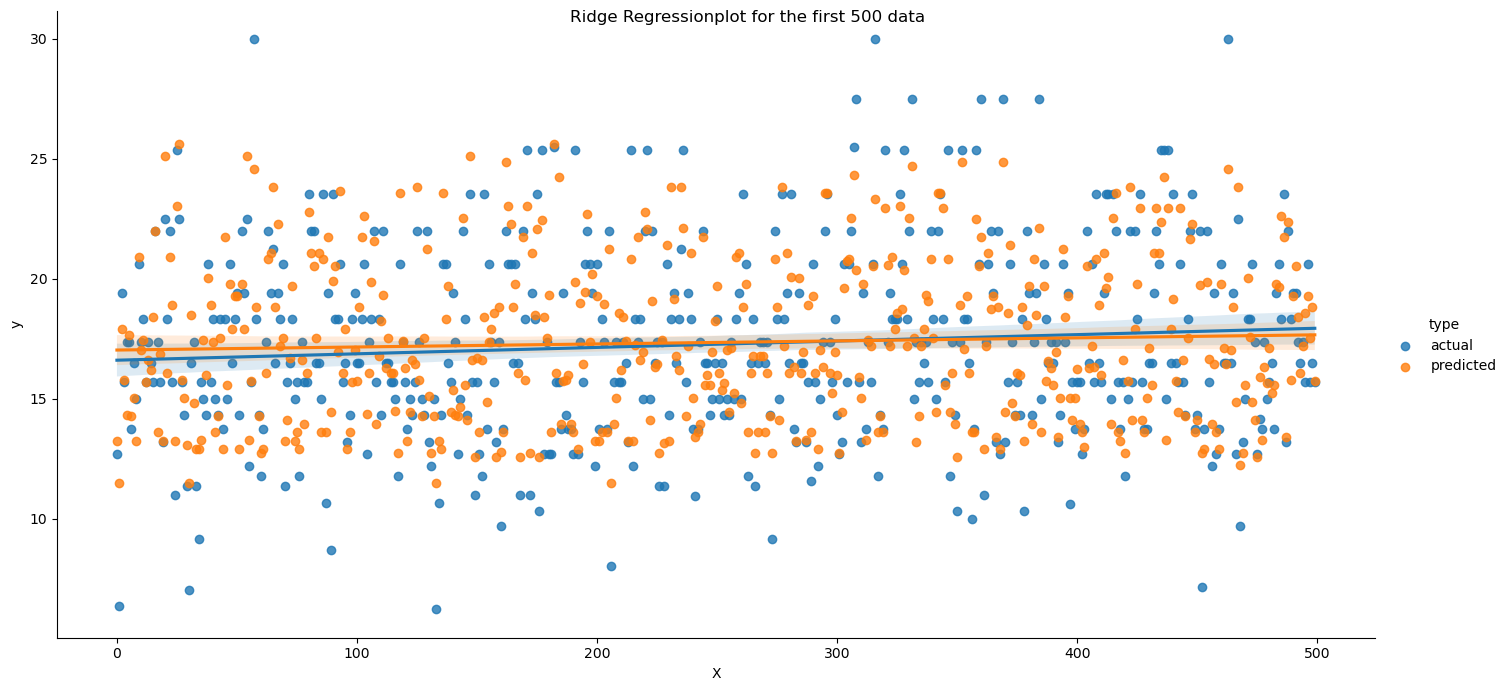

In [144]:
plot_reg_res(score['model'],result_rd)

#### Lasso Regression Model

In [145]:
mdl,score,result_ls = lassoreg_cv(df,Xfeatures,[y_feature],folds=100,min_alpha=0,max_alpha=10)

In [146]:
score_list.append(score)

In [147]:
score

{'model': 'Lasso Regression',
 'max_error': 12.477930504257916,
 'variance': 0.7074184582332796,
 'r2': 0.7074010860467885,
 'root_mean_sqr_error': 4.7932130929255425,
 'mean_abs_error': 1.6500290315326704}

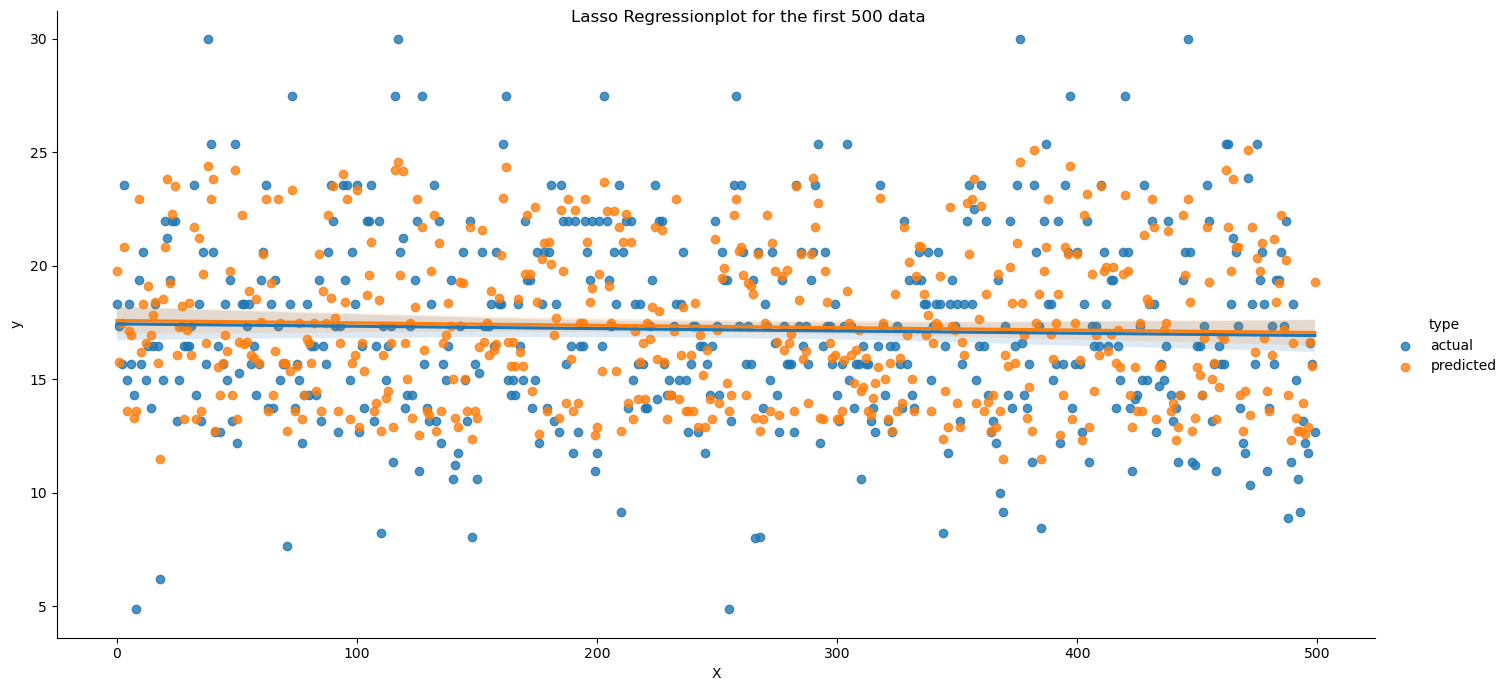

In [148]:
plot_reg_res(score['model'],result_ls)

#### Comparison & Conclusion

In [149]:
pd.DataFrame(score_list)

,model,max_error,variance,r2,root_mean_sqr_error,mean_abs_error
0,Linear Regression,12.474202,0.703520,0.703513,4.932286,1.671254
1,Ridge Regression,12.429914,0.697312,0.697283,4.925538,1.673697
2,Lasso Regression,12.477931,0.707418,0.707401,4.793213,1.650029


All models are perform almost the same based on above score. There're are no significant gaps for between each model

### 7.5 Tailpipe CO2

#### Dataset Preparation

In the EDA process, we spot that a lot of entries (Earlier than 2013), do not have this data maintained properly. We need to take out the portion of the data in out dataset that have this feature maintained and use that to create our model

In [188]:
df_co2 = df[df['Tailpipe CO2 (FT1)']>=0]
df_co2.shape

(5990, 18)

#### Correlation

In [151]:
df_corr_work = get_corr('Tailpipe CO2 (FT1)')
df_corr_work

,corr
Transmission,0.622298
Year,0.610022
Drive,0.380601
Fuel Type,0.274624
Turbocharger,0.261477
Engine Index,0.212304
Make,0.148470
Class,0.125813
Supercharger,0.111463
Engine Cylinders,0.108062


In [152]:
Xfeatures = df_corr_work[0:6].index.tolist()

In [153]:
#Reserved to store the scoring of each model
score_list = [] 

In [154]:
y_feature = 'Tailpipe CO2 (FT1)'

#### Linear Regression Model

In [155]:
mdl,score,result_lr = linreg_cv_score(df_co2,Xfeatures,[y_feature],folds=100)

In [156]:
score_list.append(score)

In [157]:
score

{'model': 'Linear Regression',
 'max_error': 322.6018321657484,
 'variance': 0.45101701163213803,
 'r2': 0.45099514926376105,
 'root_mean_sqr_error': 5377.170299155801,
 'mean_abs_error': 57.20867935060006}

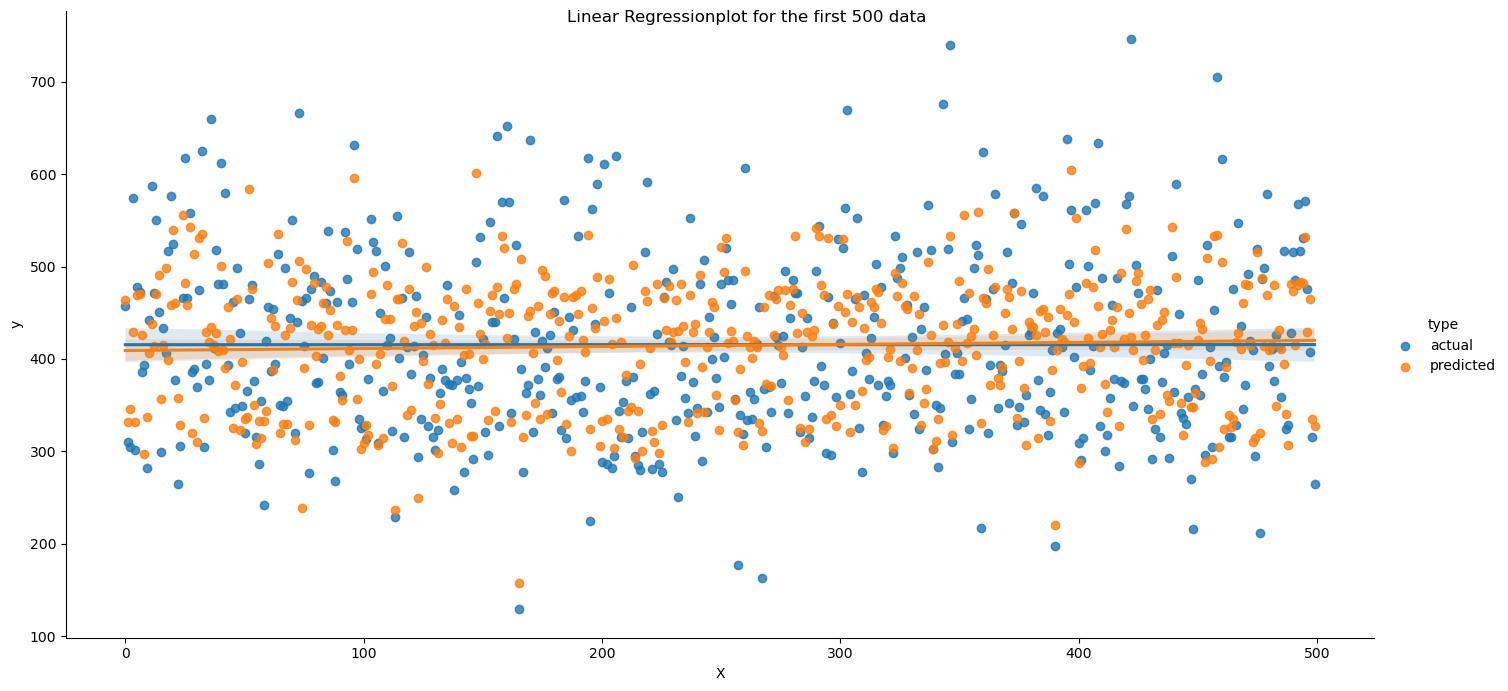

In [158]:
plot_reg_res(score['model'],result_lr)

We will use this as our baseline to create another 2 model (Ridge and Lasso) which are more advanced 

#### Ridge Regression Model

In [159]:
mdl,score,result_rd = ridgereg_cv(df_co2,Xfeatures,[y_feature],folds=100,min_alpha=0,max_alpha=10)

In [160]:
score_list.append(score)

In [161]:
score

{'model': 'Ridge Regression',
 'max_error': 320.94373731051127,
 'variance': 0.46280917212385364,
 'r2': 0.4627900802082935,
 'root_mean_sqr_error': 5530.018037181389,
 'mean_abs_error': 57.600463753269196}

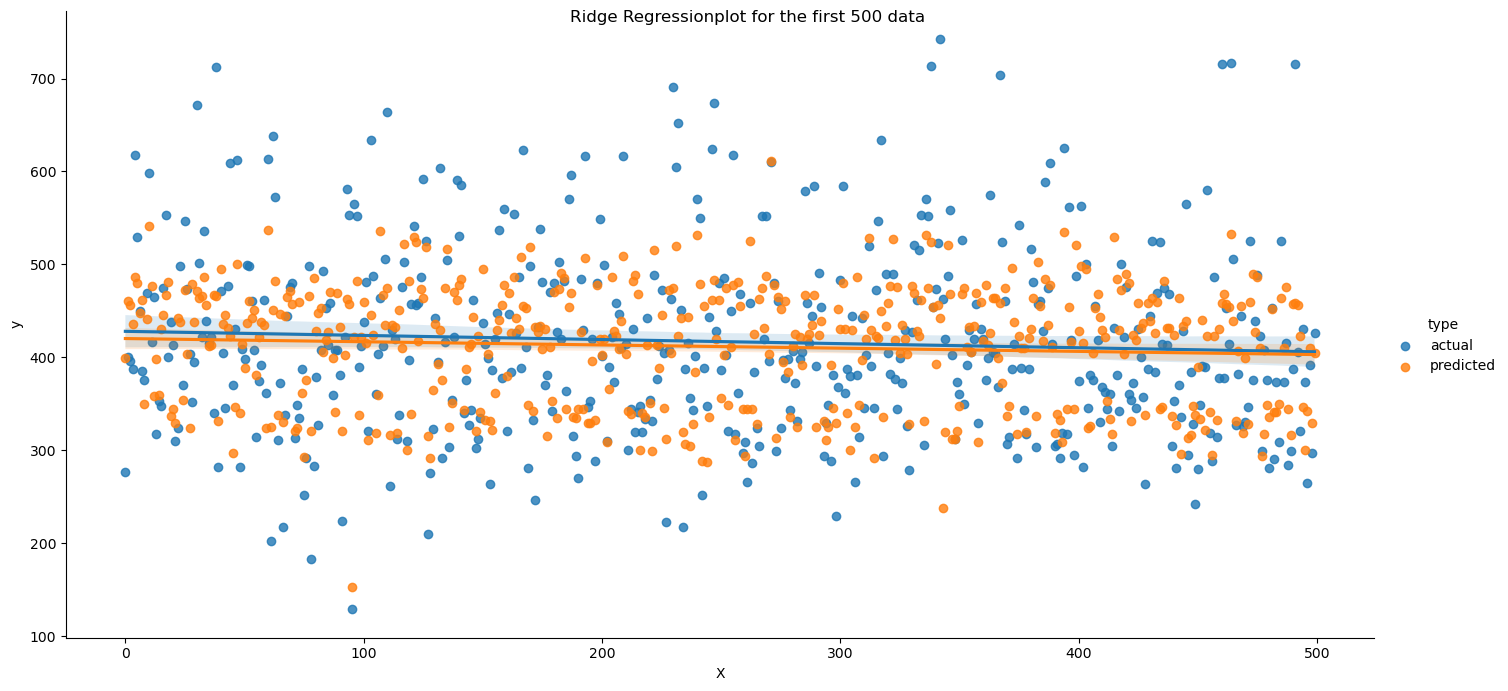

In [162]:
plot_reg_res(score['model'],result_rd)

#### Lasso Regression Model

In [163]:
mdl,score,result_ls = lassoreg_cv(df_co2,Xfeatures,[y_feature],folds=100,min_alpha=0,max_alpha=10)

In [164]:
score_list.append(score)

In [165]:
score

{'model': 'Lasso Regression',
 'max_error': 322.0037418389283,
 'variance': 0.4362297643368722,
 'r2': 0.4360980580906506,
 'root_mean_sqr_error': 5889.570012108822,
 'mean_abs_error': 59.526410011957985}

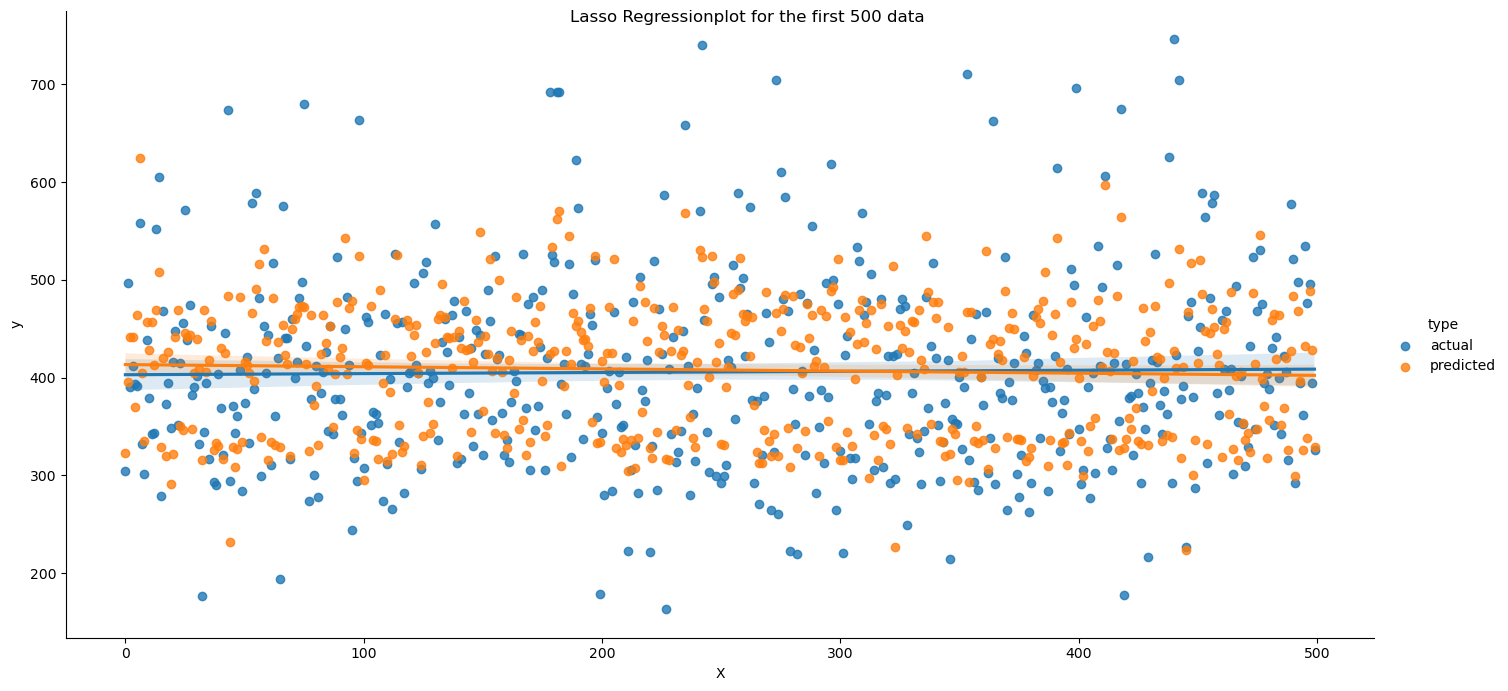

In [166]:
plot_reg_res(score['model'],result_ls)

#### Comparison & Conclusion

In [167]:
pd.DataFrame(score_list)

,model,max_error,variance,r2,root_mean_sqr_error,mean_abs_error
0,Linear Regression,322.601832,0.451017,0.450995,5377.170299,57.208679
1,Ridge Regression,320.943737,0.462809,0.462790,5530.018037,57.600464
2,Lasso Regression,322.003742,0.436230,0.436098,5889.570012,59.526410


The model perform the worst among all other Regression features that we created so fat with the R2 below 0.5 and High RMSE.

## 8. Classification Model

### 8.1 Model Determination Methodology


Same as regression method, we will train our data into these 3 models below and compare the performance based on classification metrics (Precission, Recall, F1 Score) K-Nearest Neighbors, Random Forest Classifier or Logistic Regression.
1. Logistic Regression
2. K-Nearest Neighbours
3. Random Forest Classifier


There's only 1 feature that need this model, Fuel Economy score. For this feature, we will targetted the model to get the highest precission as possible since we want to identify the ratings correctly.


### 8.2 Fuel Economy Score

#### Dataset Preparation

This feature has the same challenges as the Tailpipe CO2. we need to do the same thing as the Tailpipe CO2 feature

In [168]:
df_fes = df[df['Fuel Economy Score']>0]

In [169]:
df_fes.shape

(5989, 18)

#### Data Imbalance Checking

In [170]:
df_fes['Fuel Economy Score'].value_counts()

5     1555
4     1139
6      958
7      809
3      514
8      455
2      294
1      122
9       95
10      48
Name: Fuel Economy Score, dtype: int64

To mitigate this issue, we will do SMOTE after the Train, Test, Split on each model

#### Correlation

In [171]:
df_corr_work = get_corr('Fuel Economy Score')
df_corr_work

,corr
Year,0.602210
Transmission,0.583803
Drive,0.365698
Turbocharger,0.294771
Engine Index,0.210450
Fuel Type,0.199438
Make,0.164266
Class,0.124714
Engine Displacement,0.116062
Engine Cylinders,0.099923


In [172]:
Xfeatures = df_corr_work[0:5].index.tolist()

In [173]:
Xfeatures

['Year', 'Transmission', 'Drive', 'Turbocharger', 'Engine Index']

#### Logistic Regression

In this model we will use built in SKlearn Class Weight module to mitigate the data balance issue. The weight will be calculated by the module and will be passed to the Logistic Regression CV constructor

In [174]:
model,clscore,clscore_print,conf_matrix = logistic_reg_cv(df_fes,Xfeatures,['Fuel Economy Score'],100)

In [175]:
print(clscore_print)

              precision    recall  f1-score   support

           1       0.05      0.28      0.09        50
           2       0.06      0.08      0.07        98
           3       0.15      0.09      0.12       158
           4       0.24      0.15      0.19       377
           5       0.42      0.11      0.17       519
           6       0.27      0.07      0.11       330
           7       0.16      0.18      0.17       250
           8       0.19      0.38      0.25       154
           9       0.01      0.04      0.02        23
          10       0.03      0.50      0.06        18

    accuracy                           0.15      1977
   macro avg       0.16      0.19      0.12      1977
weighted avg       0.25      0.15      0.16      1977



<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

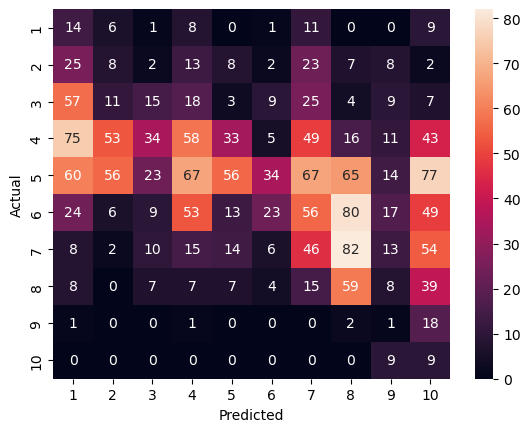

In [176]:
sns.heatmap(conf_matrix,annot=True)

#### K-Nearest Neighbours

For KNN, we will do oversample (SMOTE Oversample) to mitigate the the class balance issue. Since it don't have any CV module, we will use GridSearch for Hyperparameter tuning and cross validation

In [177]:
model,clscore,clscore_print,conf_matrix=knn_hyperparameter(df_fes,Xfeatures,['Fuel Economy Score'],100)

In [178]:
print(clscore_print)

              precision    recall  f1-score   support

           1       0.30      0.64      0.41        36
           2       0.34      0.56      0.43        89
           3       0.36      0.47      0.41       160
           4       0.55      0.48      0.51       376
           5       0.58      0.42      0.49       505
           6       0.47      0.37      0.41       333
           7       0.42      0.43      0.43       262
           8       0.34      0.35      0.34       171
           9       0.18      0.50      0.26        32
          10       0.05      0.23      0.09        13

    accuracy                           0.43      1977
   macro avg       0.36      0.44      0.38      1977
weighted avg       0.47      0.43      0.44      1977



In [180]:
model.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

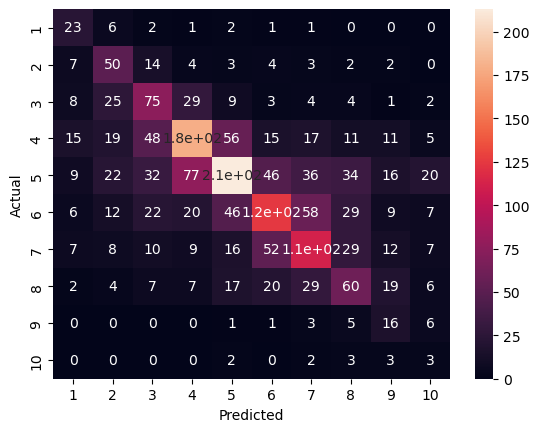

In [181]:
sns.heatmap(conf_matrix,annot=True)

#### Random Forest Classifier

In [182]:
model,clscore,clscore_print,conf_matrix= rfc_hyperparameter(df_fes,Xfeatures,['Fuel Economy Score'],100)

In [183]:
print(clscore_print)

              precision    recall  f1-score   support

           1       0.50      0.74      0.60        43
           2       0.44      0.52      0.48        96
           3       0.53      0.50      0.52       181
           4       0.58      0.66      0.62       381
           5       0.64      0.59      0.61       506
           6       0.47      0.37      0.41       312
           7       0.46      0.43      0.45       271
           8       0.36      0.45      0.40       132
           9       0.49      0.50      0.49        40
          10       0.30      0.67      0.42        15

    accuracy                           0.53      1977
   macro avg       0.48      0.54      0.50      1977
weighted avg       0.53      0.53      0.53      1977



In [185]:
model.best_params_

{'max_depth': 151,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

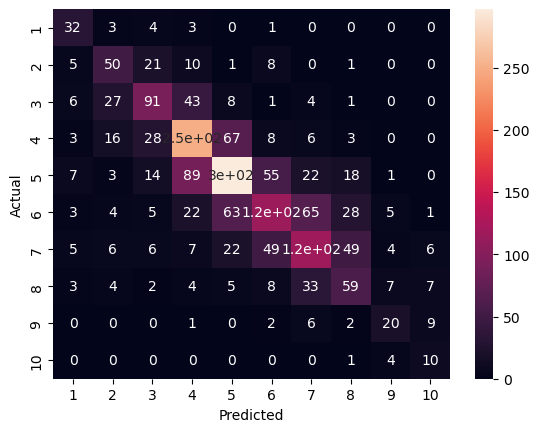

In [186]:
sns.heatmap(conf_matrix,annot=True)